In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#Import data from csv
import pandas as pd
df = pd.read_csv('gdrive/MyDrive/Reva/SOL_mat_log.csv',parse_dates=["order_date","prodn_date","deliver_date"])

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from IPython.core.display import display, HTML
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
# Load required libraries
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from geopy.geocoders import Nominatim
from geopy import distance

import sklearn
from sklearn import preprocessing

import seaborn as sns
pd.options.display.max_rows = 200
pd.options.display.max_columns = None

In [ ]:
df.dtypes

sc_desc                     object
sc_code                      int64
prdt_gp                      int64
prdt_cat                    object
sm_zone                     object
sol_id                       int64
order_date          datetime64[ns]
prodn_date          datetime64[ns]
deliver_date        datetime64[ns]
cust_seg                     int64
cust_id                      int64
cust_city                   object
cust_country                object
cust_lat                   float64
cust_long                  float64
prd_zone                    object
prdt_code                    int64
prdt_seg                    object
prdt_desc                   object
facility_id                 object
facility_city               object
facility_country            object
facility_lat               float64
facility_long              float64
MOT                         object
lt_prodn                     int64
lt_deliver                   int64
timetodeliver                int64
comp_rate           

In [ ]:
df.head(5)

,sc_desc,sc_code,prdt_gp,prdt_cat,sm_zone,sol_id,order_date,prodn_date,deliver_date,cust_seg,cust_id,cust_city,cust_country,cust_lat,cust_long,prd_zone,prdt_code,prdt_seg,prdt_desc,facility_id,facility_city,facility_country,facility_lat,facility_long,MOT,lt_prodn,lt_deliver,timetodeliver,comp_rate
0,HealthCare,900,8406,AMI,LATAM,9092775621,2019-01-08,2019-08-20,2019-08-25,2,1024680526,SAN JOSE,Costa Rica,9.932543,-84.079578,US,429,cat4,RS Brilliance CT Big Bore Oncology,US19,Bothell,United States,47.760111,-122.205445,Air Direct,19,5,24,4.166667
1,HealthCare,900,8406,AMI,NAM,9092775625,2019-01-12,2020-04-01,2020-01-13,5,1024679447,"BROCKTON, MA",United States,42.083433,-71.018379,US,426,cat3,CT 7500 LFL,US19,Bothell,United States,47.760111,-122.205445,Air Direct,34,9,43,2.325581
2,HealthCare,900,8406,AMI,NAM,9092775627,2019-01-14,2019-05-02,2019-12-02,4,1024679500,SILVIS,United States,41.512256,-90.415130,US,429,cat4,RS Brilliance CT Big Bore Oncology,US19,Bothell,United States,47.760111,-122.205445,Air Direct,22,6,28,3.571429
3,HealthCare,900,8406,AMI,NAM,9092775628,2019-01-15,2019-02-27,2019-04-03,2,1024679440,Worcester,United States,42.262562,-71.801888,US,428,cat2,RS iCT 128,US19,Bothell,United States,47.760111,-122.205445,Air Direct,43,5,48,2.083333
4,HealthCare,900,8406,AMI,NAM,9092775634,2019-01-21,2019-02-21,2019-01-03,3,1024679705,MIDDLEBURG,United States,38.969019,-77.735506,US,424,cat5,Incisive CT 2 cm,US19,Bothell,United States,47.760111,-122.205445,Air Direct,41,8,49,2.040816


In [ ]:
# No null values
df.isna().sum()

sc_desc             0
sc_code             0
prdt_gp             0
prdt_cat            0
sm_zone             0
sol_id              0
order_date          0
prodn_date          0
deliver_date        0
cust_seg            0
cust_id             0
cust_city           0
cust_country        0
cust_lat            0
cust_long           0
prd_zone            0
prdt_code           0
prdt_seg            0
prdt_desc           0
facility_id         0
facility_city       0
facility_country    0
facility_lat        0
facility_long       0
MOT                 0
lt_prodn            0
lt_deliver          0
timetodeliver       0
comp_rate           0
dtype: int64

In [ ]:
#There are no duplicated items
dup = df[df.duplicated()]
dup

,sc_desc,sc_code,prdt_gp,prdt_cat,sm_zone,sol_id,order_date,prodn_date,deliver_date,cust_seg,cust_id,cust_city,cust_country,cust_lat,cust_long,prd_zone,prdt_code,prdt_seg,prdt_desc,facility_id,facility_city,facility_country,facility_lat,facility_long,MOT,lt_prodn,lt_deliver,timetodeliver,comp_rate


In [ ]:
# Description and code for supply chain carries same info as it is part of same function. Can be removed
del df['sc_desc']
del df['sc_code']


In [ ]:
# Data analysis
print("Order line count",df.sol_id.count())
print("Product count",df.prdt_code.nunique())
print("Product segment count",df.prdt_seg.nunique())
print("Customer segment count",df.cust_seg.nunique())
print("Number of manufacturing facilities",df.facility_id.nunique())
print("Number of sales zones",df.sm_zone.nunique())
print("Number of customer countries",df.cust_country.nunique())
print("Number of customers",df.cust_id.nunique())
print("Number of columns",len(df.columns))

Order line count 64185
Product count 33
Product segment count 5
Customer segment count 5
Number of manufacturing facilities 14
Number of sales zones 14
Number of customer countries 79
Number of customers 4971
Number of columns 27


In [ ]:
df.describe

<bound method NDFrame.describe of        prdt_gp prdt_cat sm_zone      sol_id order_date prodn_date  \
0         8406      AMI   LATAM  9092775621 2019-01-08 2019-08-20   
1         8406      AMI     NAM  9092775625 2019-01-12 2020-04-01   
2         8406      AMI     NAM  9092775627 2019-01-14 2019-05-02   
3         8406      AMI     NAM  9092775628 2019-01-15 2019-02-27   
4         8406      AMI     NAM  9092775634 2019-01-21 2019-02-21   
...        ...      ...     ...         ...        ...        ...   
64180     8406      CAN     NAM  8406788386 2022-10-29 2022-09-12   
64181     8406      CAN   LATAM  8406788389 2022-10-27 2022-12-14   
64182     8406      CAN     CAR  8406777604 2019-07-25 2019-10-09   
64183     8406      CAN     CAR  8406782441 2020-09-01 2020-02-24   
64184     8406      CAN     CAR  8406787001 2022-09-23 2022-10-23   

      deliver_date  cust_seg     cust_id                cust_city  \
0       2019-08-25         2  1024680526                 SAN JOSE   

In [ ]:
# Latitude and Longitude 
df['cust_lat'] = pd.to_numeric(df['cust_lat'], errors='coerce')
df['cust_long'] = pd.to_numeric(df['cust_long'], errors='coerce')
df['facility_lat'] = pd.to_numeric(df['facility_lat'], errors='coerce')
df['facility_long'] = pd.to_numeric(df['facility_long'], errors='coerce')

In [ ]:
def geofind(xlat,xlong,ylat,ylong):
    origin=(xlat,xlong)
    dest=(ylat,ylong)
    geo_dist=distance.geodesic(origin,dest,ellipsoid='GRS-80').miles
    return geo_dist

In [ ]:
df['geo_dist'] = df.apply(
    lambda x: geofind(x['cust_lat'], x['cust_long'], x['facility_lat'], x['facility_long']), 
    axis=1
)

In [ ]:
df['geo_dist']=np.round(df['geo_dist'],0)

In [ ]:
df_v1=df.copy(deep=True)
df_v2=df.copy(deep=True)
df_eda=df.copy(deep=True)

In [ ]:
del df_v1['prdt_code']
del df_v1['sol_id']
del df_v1['cust_id']
del df_v1['prdt_gp']
del df_v1['cust_lat']
del df_v1['cust_long']
del df_v1['facility_lat']
del df_v1['facility_long']
del df_v1['facility_id']
del df_v1['cust_city']
del df_v1['cust_country']
del df_v1['geo_dist']
del df_v1['facility_city']
del df_v1['lt_prodn']
del df_v1['lt_deliver']
#comp rate not required unless it needs to be used to predict for existing sales orders
del df_v1['comp_rate']

del df_eda['prdt_code']
del df_eda['prdt_gp']
del df_eda['cust_lat']
del df_eda['cust_long']
del df_eda['facility_lat']
del df_eda['facility_long']
del df_eda['facility_id']
del df_eda['cust_city']
del df_eda['cust_country']
del df_eda['lt_prodn']
del df_eda['lt_deliver']
#comp rate not required unless it needs to be used to predict for existing sales orders
del df_eda['comp_rate']

In [ ]:
df_eda.columns


Index(['prdt_cat', 'sm_zone', 'sol_id', 'order_date', 'prodn_date',
       'deliver_date', 'cust_seg', 'cust_id', 'prd_zone', 'prdt_seg',
       'prdt_desc', 'facility_city', 'facility_country', 'MOT',
       'timetodeliver', 'geo_dist'],
      dtype='object')

In [ ]:
df_v1['order_month']=df_v1['order_date'].dt.month
df_v1['order_week']=df_v1['order_date'].dt.isocalendar().week
df_v1['prodn_month']=df_v1['prodn_date'].dt.month
df_v1['prodn_week']=df_v1['prodn_date'].dt.isocalendar().week
df_v1['deliver_month']=df_v1['deliver_date'].dt.month
df_v1['deliver_week']=df_v1['deliver_date'].dt.isocalendar().week

df_eda['order_month']=df_eda['order_date'].dt.month
df_eda['order_week']=df_eda['order_date'].dt.isocalendar().week
df_eda['prodn_month']=df_eda['prodn_date'].dt.month
df_eda['prodn_week']=df_eda['prodn_date'].dt.isocalendar().week
df_eda['deliver_month']=df_eda['deliver_date'].dt.month
df_eda['deliver_week']=df_eda['deliver_date'].dt.isocalendar().week

#Remove the dates now that the dates have been expressed as month and week
del df_v1['order_date']
del df_v1['prodn_date']
del df_v1['deliver_date']

del df_eda['order_date']
del df_eda['prodn_date']
del df_eda['deliver_date']

In [ ]:
df_eda.dtypes

prdt_cat             object
sm_zone              object
sol_id                int64
cust_seg              int64
cust_id               int64
prd_zone             object
prdt_seg             object
prdt_desc            object
facility_city        object
facility_country     object
MOT                  object
timetodeliver         int64
geo_dist            float64
order_month           int64
order_week           UInt32
prodn_month           int64
prodn_week           UInt32
deliver_month         int64
deliver_week         UInt32
dtype: object

In [ ]:
cat=[ 'prdt_cat','sm_zone', 'cust_seg', 'prd_zone', 'prdt_seg', 'prdt_desc', 'facility_country','facility_city', 'MOT',
     'order_month','order_week', 'prodn_month', 'prodn_week', 'deliver_month','deliver_week']
le = preprocessing.LabelEncoder()
for i in cat:
    le.fit(df_eda[i].drop_duplicates()) 
    df_eda[i] = le.transform(df_eda[i])

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

In [ ]:
# Production location, sales zone are positively correlated to time to deliver while production week and month are mildly negatively correlated
df_eda.corr()['timetodeliver'].sort_values()

sol_id             -0.150245
facility_city      -0.106422
prodn_week         -0.028964
prodn_month        -0.027378
order_month        -0.001260
order_week         -0.001025
deliver_week        0.021241
deliver_month       0.024284
cust_seg            0.033453
prdt_desc           0.048813
prdt_cat            0.056860
prdt_seg            0.064871
MOT                 0.069005
cust_id             0.072305
sm_zone             0.088805
geo_dist            0.270177
prd_zone            0.363187
facility_country    0.489416
timetodeliver       1.000000
Name: timetodeliver, dtype: float64

<AxesSubplot:>

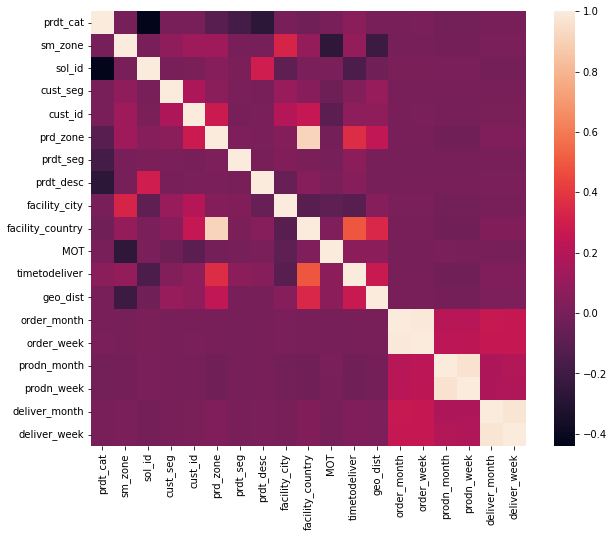

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df_eda.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),square=True, ax=ax)

count    64185.000000
mean        35.098014
std         11.831374
min         12.000000
25%         27.000000
50%         33.000000
75%         41.000000
max        104.000000
Name: timetodeliver, dtype: float64


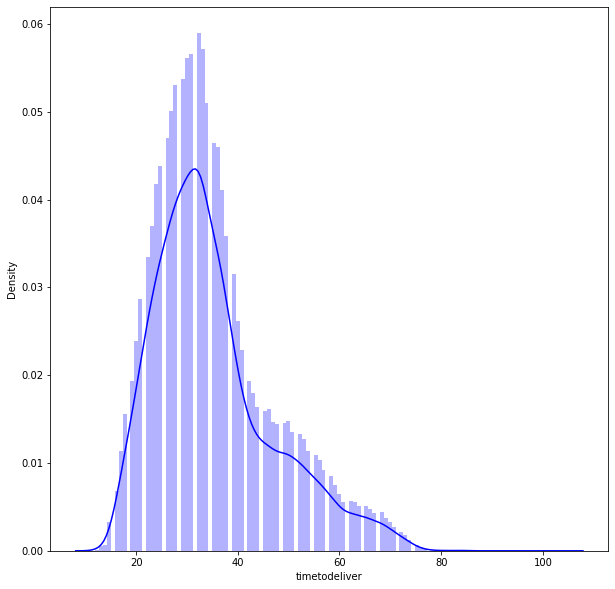

In [ ]:
print(df_eda['timetodeliver'].describe())
plt.figure(figsize=(10, 10))
sns.distplot(df_eda['timetodeliver'], color='b', bins=120, hist_kws={'alpha': 0.3});

In [ ]:
df[df['timetodeliver']==104]

,prdt_gp,prdt_cat,sm_zone,sol_id,order_date,prodn_date,deliver_date,cust_seg,cust_id,cust_city,cust_country,cust_lat,cust_long,prd_zone,prdt_code,prdt_seg,prdt_desc,facility_id,facility_city,facility_country,facility_lat,facility_long,MOT,lt_prodn,lt_deliver,timetodeliver,comp_rate,geo_dist
53122,8406,CAN,CEA,8406777803,2019-09-16,2019-11-11,2019-11-17,2,94638431,Cheongjusi,South Korea,36.642434,127.489032,PL,629,cat5,Advanced Mammography undv,PL01,Alges,Portugal,38.7,-9.233333,Air Direct,98,6,104,0.961538,6561.0


In [ ]:
df[df['timetodeliver']==12]

,prdt_gp,prdt_cat,sm_zone,sol_id,order_date,prodn_date,deliver_date,cust_seg,cust_id,cust_city,cust_country,cust_lat,cust_long,prd_zone,prdt_code,prdt_seg,prdt_desc,facility_id,facility_city,facility_country,facility_lat,facility_long,MOT,lt_prodn,lt_deliver,timetodeliver,comp_rate,geo_dist
61267,8406,CAN,SEA,8406775698,2019-05-07,2019-07-13,2019-07-17,3,94024216,Uttradit,Thailand,17.631111,100.100833,CN,634,cat5,Lung Cancer Orchstor,CN07,Shanghai,China,31.224361,121.46917,Air Direct,8,4,12,8.333333,1634.0
61502,8406,CAN,SA,8406781197,2020-05-20,2020-05-28,2020-01-06,4,1024680536,KELANTAN,Malaysia,5.402130,102.063597,CN,630,cat4,Radiology ITx undv,CN07,Shanghai,China,31.224361,121.46917,Air Direct,8,4,12,8.333333,2177.0
61639,8406,CAN,SEA,8406784862,2021-10-12,2021-12-18,2021-12-22,3,189135,PITSANULOKE,Thailand,16.768934,100.078976,CN,631,cat3,Dynacad Prostrate,CN07,Shanghai,China,31.224361,121.46917,Air Direct,8,4,12,8.333333,1673.0
61711,8406,CAN,SEA,8406786671,2022-10-03,2022-03-18,2022-03-22,3,198231,"Khet Huaykhwang, Bangkok 10310",Thailand,13.450000,99.230000,CN,631,cat3,Dynacad Prostrate,CN07,Shanghai,China,31.224361,121.46917,Air Direct,8,4,12,8.333333,1869.0
62789,8406,CAN,GCHN,8406782025,2020-09-26,2020-04-10,2020-08-10,1,910018205,Qiannanzhou,China,34.252400,120.346300,CN,629,cat5,Advanced Mammography undv,CN07,Shanghai,China,31.224361,121.46917,Truck LTL,8,4,12,8.333333,219.0


<Figure size 648x432 with 0 Axes>

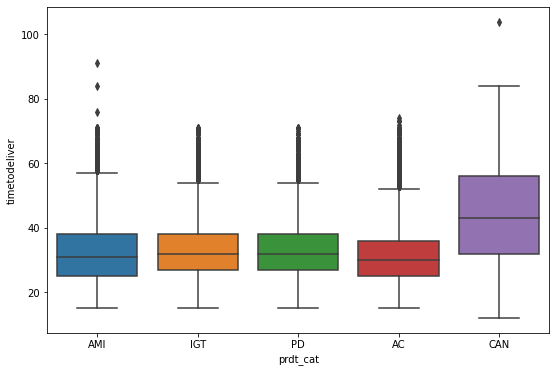

In [ ]:
plt.figure(figsize = (9, 6))
ax = sns.boxplot(x='prdt_cat', y='timetodeliver', data=df_v1)

<Figure size 720x432 with 0 Axes>

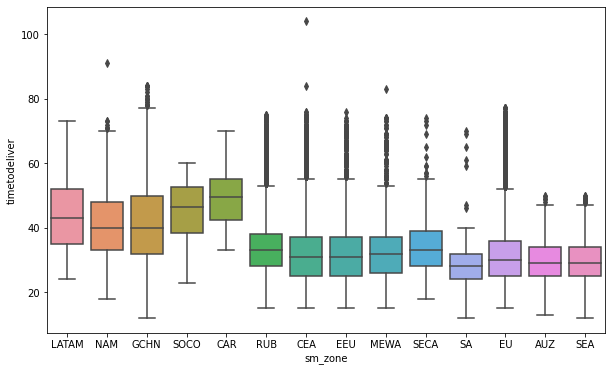

In [ ]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='sm_zone', y='timetodeliver', data=df_v1)

<Figure size 648x432 with 0 Axes>

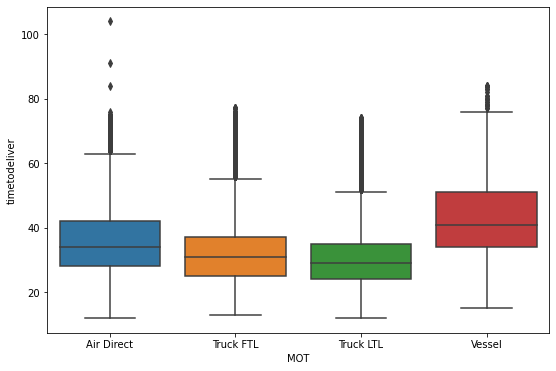

In [ ]:
plt.figure(figsize = (9, 6))
ax = sns.boxplot(x='MOT', y='timetodeliver', data=df_v1)

<Figure size 720x432 with 0 Axes>

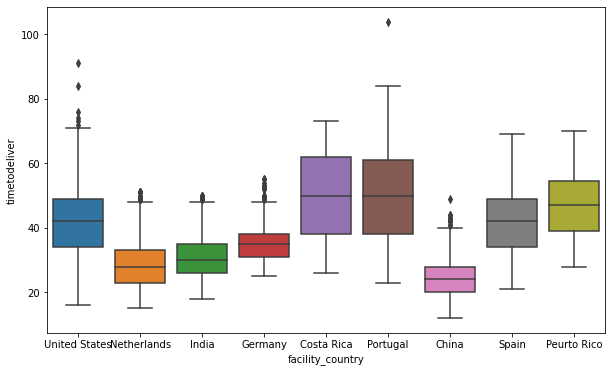

In [ ]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='facility_country', y='timetodeliver', data=df_v1)

<Figure size 288x360 with 0 Axes>

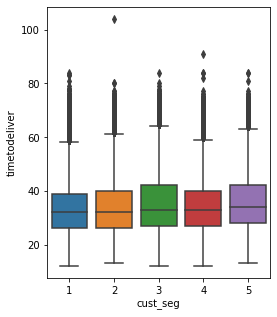

In [ ]:
plt.figure(figsize = (4, 5))
ax = sns.boxplot(x='cust_seg', y='timetodeliver', data=df_v1)

<Figure size 288x360 with 0 Axes>

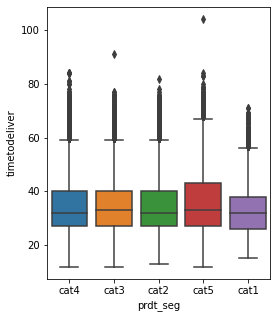

In [ ]:
plt.figure(figsize = (4, 5))
ax = sns.boxplot(x='prdt_seg', y='timetodeliver', data=df_v1)